# Calculation of Energy Demands for Module Manufacturing

This journal documents the calculations of the energy demands to manufacture an average crystalline silion module. Included in this energy damand is lay-up, string and tab, lamination, and framing.

In [1]:
import numpy as np
import pandas as pd
import os,sys
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
cwd = os.getcwd() #grabs current working directory
skipcols = ['Source', 'Notes']
e_modmfg_raw = pd.read_csv(cwd+"/../../../PV_ICE/baselines/SupportingMaterial/energy-input-module_mfg.csv",
                                     index_col='year', usecols=lambda x: x not in skipcols)

Text(0.5, 1.0, 'Module Assembly Energy kWhpm2')

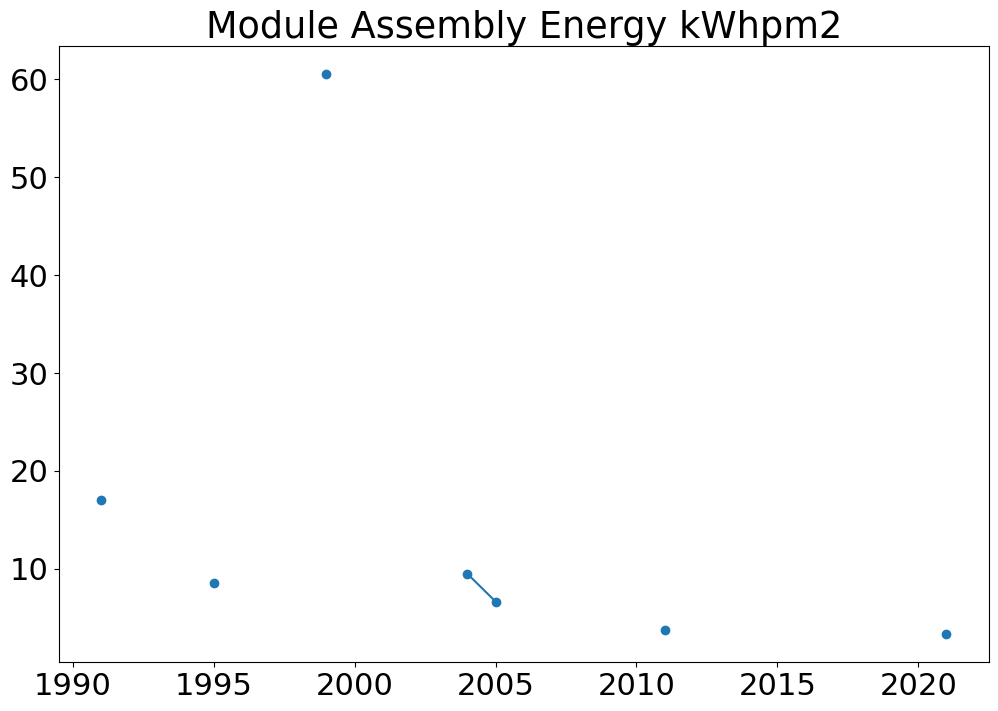

In [3]:
plt.plot(e_modmfg_raw, marker='o')
plt.title(e_modmfg_raw.columns[0])

From the raw data, we can see there is an outlier. This outlier is from K. Knapp and T. Jester, “Empirical investigation of the energy payback time for photovoltaic modules,” Solar Energy, vol. 71, no. 3, pp. 165–172, Jan. 2001, doi: 10.1016/S0038-092X(01)00033-0. This analysis is good in that a company divided their electricity bill by the number of modules manufactured. However, this ends up representing more of an Input-Output LCA than a process based LCA. Therefore, we will exclude this data point. 

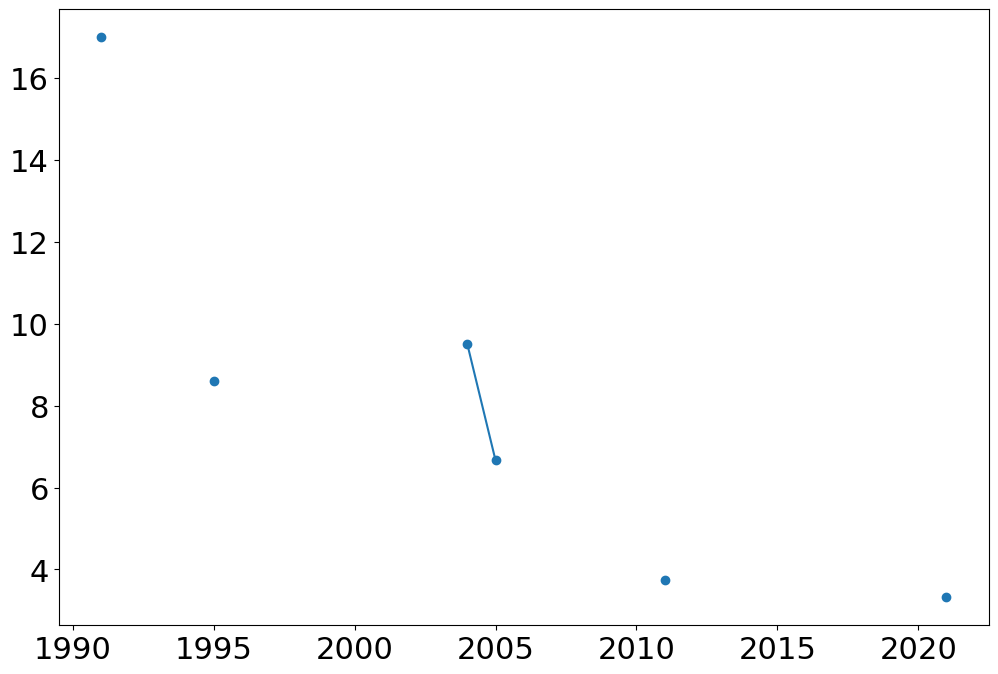

In [4]:
e_modmfg_tidy = e_modmfg_raw.copy()
e_modmfg_tidy.loc[e_modmfg_tidy.idxmax(),]=np.nan #find the max and set it to Nan
plt.plot(e_modmfg_tidy, marker='o')

Now the 1995 value is slightly lower than the 2004 value. Both are reputable sources (Alsema and Jungbluth respectively), and while there is likely not an increase between these two years, we will not modify these values.

Therefore, the next step is to linearly interpolate between available data.

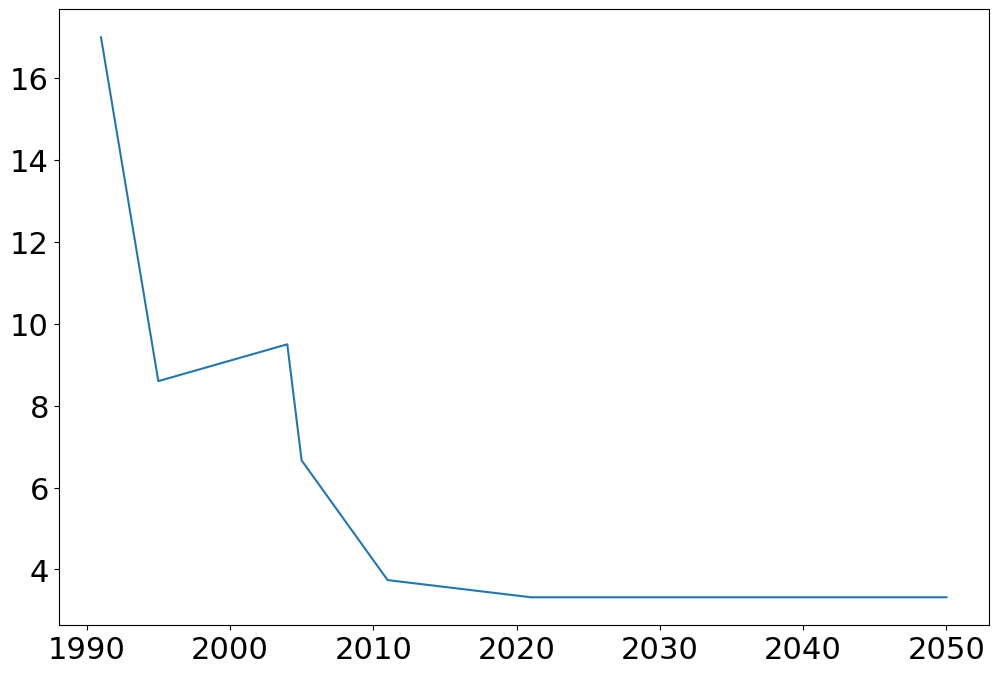

In [5]:
e_modmfg_filled = e_modmfg_tidy.interpolate(method='linear') 
plt.plot(e_modmfg_filled)

In [8]:
#trim early years
e_modmfg = e_modmfg_filled.loc[e_modmfg_filled.index>=1995]*1000 #in Wh/m2)
e_modmfg.columns=['Module Assembly Energy Whpm2']

In [9]:
#print to csv in Wh/m2
e_modmfg.to_csv(cwd+"/../../../PV_ICE/baselines/SupportingMaterial/output-energy-module-mfg.csv")